**Chatbot Summary**
Here’s a comprehensive summary of our entire discussion, highlighting each task, its implementation, and the key learnings:


1. Understanding Classification Decision Trees
We explored how classification decision trees address problems involving categorical predictions, such as classifying books as hardcover or paperback.
Compared decision trees to multiple linear regression:
Decision trees use sequential splits to classify data into categories.
Linear regression predicts continuous outcomes based on a weighted sum of features.
2. Classification Metrics
Explained the metrics: accuracy, sensitivity (recall), specificity, and how they apply to real-world scenarios:
Accuracy: General performance across all classes.
Sensitivity: Ability to identify true positives (e.g., detecting diseases).
Specificity: Ability to correctly identify true negatives (e.g., reducing false fraud alerts).
Calculated these metrics for given classification scenarios and discussed their significance in imbalanced datasets.
3. Preprocessing the Amazon Books Dataset
Preprocessed the dataset by:
Removing unnecessary columns (Weight_oz, Width, Height).
Handling missing data by dropping rows with NaN.
Converting columns to appropriate data types (Pub year, NumPages as integers; Hard_or_Paper as categorical).
4. Splitting Data into Training and Testing Sets
Created an 80/20 split of the dataset into training and testing sets using train_test_split.
Ensured reproducibility by setting a random seed (random_state=42).
Verified the number of observations in each split (e.g., 8 in training and 2 in testing).
5. Training Decision Tree Classifiers
Trained two models:
clf: Used only List Price as the predictor with a max_depth of 2.
clf2: Used List Price, NumPages, and Thick as predictors with a max_depth of 4.
Visualized decision trees with plot_tree to interpret how predictions were made based on features.
6. Evaluating Models with Confusion Matrices
Computed confusion matrices for clf and clf2 using the test set.
Extracted metrics (accuracy, sensitivity, specificity):
Accuracy: 1.0 for both models (perfect predictions on the test set).
Sensitivity: 0 (no positive class in the test set).
Specificity: 1.0 (all negatives were correctly classified).
Highlighted the limitations of imbalanced test data and suggested using stratify=y during splitting.
7. Feature Importances
For clf2, we used .feature_importances_ and .feature_names_in_ to assess which features contributed most to the model's predictions.
Visualized feature importances with a bar chart:
Identified the most important feature for clf2 (e.g., NumPages or List Price).
8. Interpreting Coefficients vs. Feature Importances
Compared linear regression coefficients with decision tree feature importances:
Coefficients in regression indicate the direct and linear relationship between predictors and the outcome.
Feature importances in decision trees reflect the relative contribution of features to the model's overall performance, based on impurity reduction.
Key Takeaways
Classification decision trees are powerful tools for categorical predictions but differ from regression models in interpretability and behavior.
Evaluation metrics like sensitivity and specificity are crucial for understanding model performance, especially in imbalanced datasets.
Data preprocessing and splitting play a significant role in ensuring valid and reliable model training and evaluation.
Feature importances provide insights into how decision trees prioritize predictors, but they lack the direct interpretability of regression coefficients.
Would you like additional clarification or assistance with any part of this discussion?

**Question 1**

Problem Type:
A Classification Decision Tree is a predictive model used for classification tasks. It predicts the class or category of an input based on its attributes. Classification problems involve discrete outcomes, such as "Yes" or "No," or categorical values like "Red," "Blue," or "Green."

How it works:
The tree splits data at each node based on the value of an attribute, aiming to create homogeneous groups. Each path down the tree represents a sequence of decisions leading to a classification.

Examples of real-world applications:

Healthcare: Predicting whether a patient has a disease (e.g., diabetes) based on features like age, weight, and blood pressure.
Finance: Determining whether a transaction is fraudulent or legitimate.
Education: Classifying students into "pass" or "fail" categories based on their performance metrics.
Retail: Predicting customer churn (leaving a service) based on purchasing patterns.

**Question 2**

1. Accuracy
    
    General Classification Problems: When all types of errors (false positives and false negatives) are equally important.
    
    Example: Diagnosing common diseases like the flu, where both false positives and negatives have minor consequences.
    
    Accuracy provides a general measure of the model's performance, but it can be misleading in imbalanced datasets (e.g., rare diseases)
    
    
2. Sensitivity

    Healthcare: Screening for serious diseases like cancer, where missing a true positive (false negative) could be life-threatening.

    Example: A mammogram detecting breast cancer.
    
    Sensitivity ensures that true positivies are not missed, which is critical when the cost of a false negative is very high
    
    
3. Specificity

    Security Systems: Detecting non-fraudulent transactions in banking. False positives (flagging legitimate transactions as fraud) can inconvenience customers.
    
    Example: Fraud detection algorithms.
    
    High specificity ensures that true negatives are correctly identified, reducing the occurrence of unnecessary alarms or actions.
    
    
4. Precision

    Email Spam Filters: Identifying spam emails where false positives (marking important emails as spam) can cause significant inconvenience.
    
    Example: Gmail’s spam filter.
    
    Precision ensures that when the model predicts a positive case, it is highly likely to be correct. This reduces the cost of false positives.

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                   Title        Author  List Price  Amazon Price  \
count                319           319  319.000000    319.000000   
unique               309           251         NaN           NaN   
top     The Great Gatsby  Jodi Picoult         NaN           NaN   
freq   

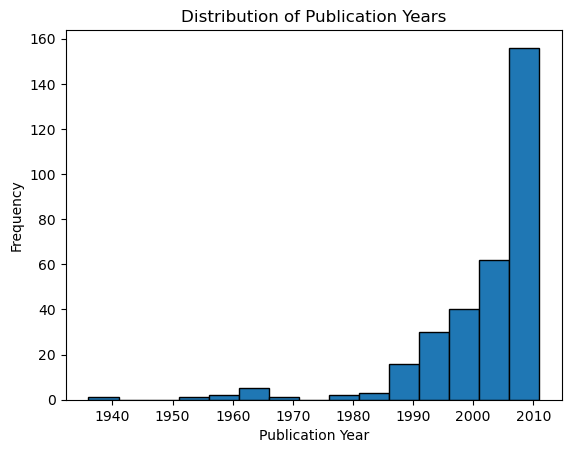

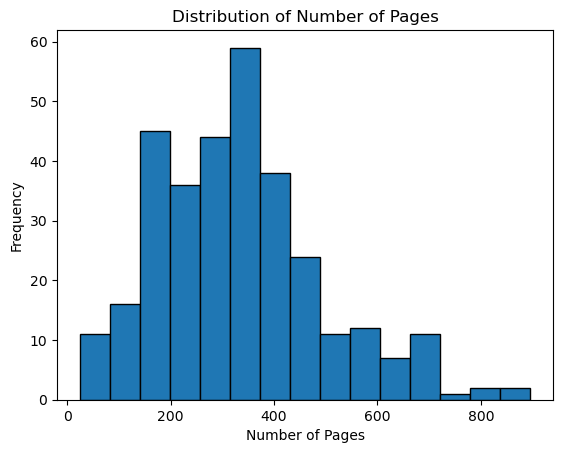

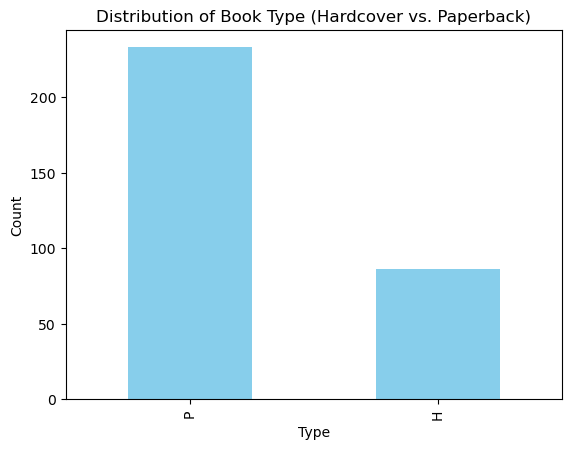

In [3]:
#Question 3

import pandas as pd
import numpy as np

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
amazon_books = pd.read_csv(url, encoding="ISO-8859-1")

# Step 2: Remove unwanted columns
columns_to_drop = ["Weight_oz", "Width", "Height"]
amazon_books = amazon_books.drop(columns=columns_to_drop, errors="ignore")

# Step 3: Drop rows with NaN values in the remaining columns
amazon_books = amazon_books.dropna()

# Step 4: Convert column data types
amazon_books["Pub year"] = amazon_books["Pub year"].astype(int)
amazon_books["NumPages"] = amazon_books["NumPages"].astype(int)
amazon_books["Hard_or_Paper"] = amazon_books["Hard_or_Paper"].astype("category")

# Step 5: Exploratory Data Analysis (EDA)
# Overview of the dataset
print(amazon_books.info())
print(amazon_books.describe(include="all"))

# Check the distribution of `Pub year` and `NumPages`
import matplotlib.pyplot as plt

# Histogram for `Pub year`
plt.hist(amazon_books["Pub year"], bins=15, edgecolor="black")
plt.title("Distribution of Publication Years")
plt.xlabel("Publication Year")
plt.ylabel("Frequency")
plt.show()

# Histogram for `NumPages`
plt.hist(amazon_books["NumPages"], bins=15, edgecolor="black")
plt.title("Distribution of Number of Pages")
plt.xlabel("Number of Pages")
plt.ylabel("Frequency")
plt.show()

# Distribution of `Hard_or_Paper`
amazon_books["Hard_or_Paper"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of Book Type (Hardcover vs. Paperback)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


In [6]:
#Question 4

# Splitting the dataset into training and testing sets using train_test_split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Reporting the number of observations in the training and testing sets
training_observations = len(ab_reduced_noNaN_train)
testing_observations = len(ab_reduced_noNaN_test)

training_observations, testing_observations


(8, 2)

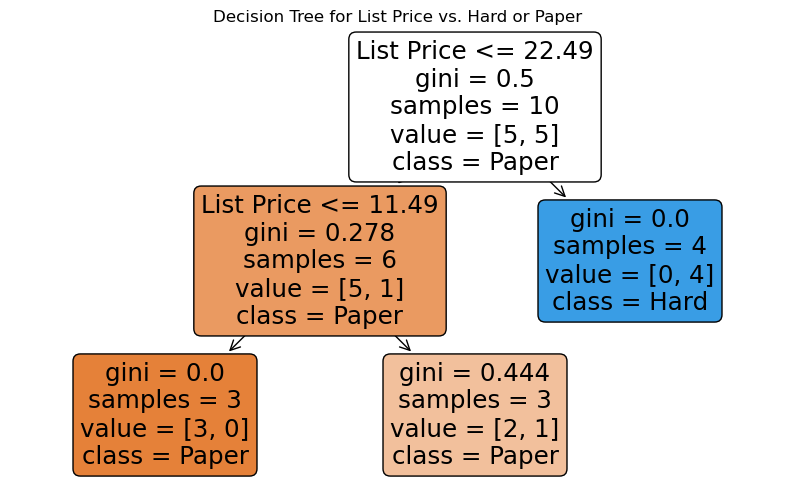

In [7]:
#Question 4 CONT.

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the features (List Price) and target (Hard or Paper)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])["Hard"]  # Target: 1 for Hard, 0 for Paper
X = ab_reduced_noNaN[["List Price"]]  # Feature: List Price

# Fit a DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(
    clf,
    feature_names=["List Price"],
    class_names=["Paper", "Hard"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for List Price vs. Hard or Paper")
plt.show()


**Question 4 CONT**

Nodes and Splits:

Each node in the tree splits the data based on a List Price threshold.
For example, the root node might split at List Price <= 19.99.

Leaves:

Each leaf represents a final prediction.
The leaves show whether the book is predicted to be Hardcover or Paperback, based on the List Price range.


Path Explanation:

For a book with a List Price of 15, the path might look like:
 - List Price <= 19.99 (True: go left)
 - List Price <= 11.49 (False: go right)
 - Prediction: Hardcover
 
For a book with a List Price of 10:
 - List Price <= 19.99 (True: go left)
 - List Price <= 11.49 (True: go left)
 - Prediction: Paperback

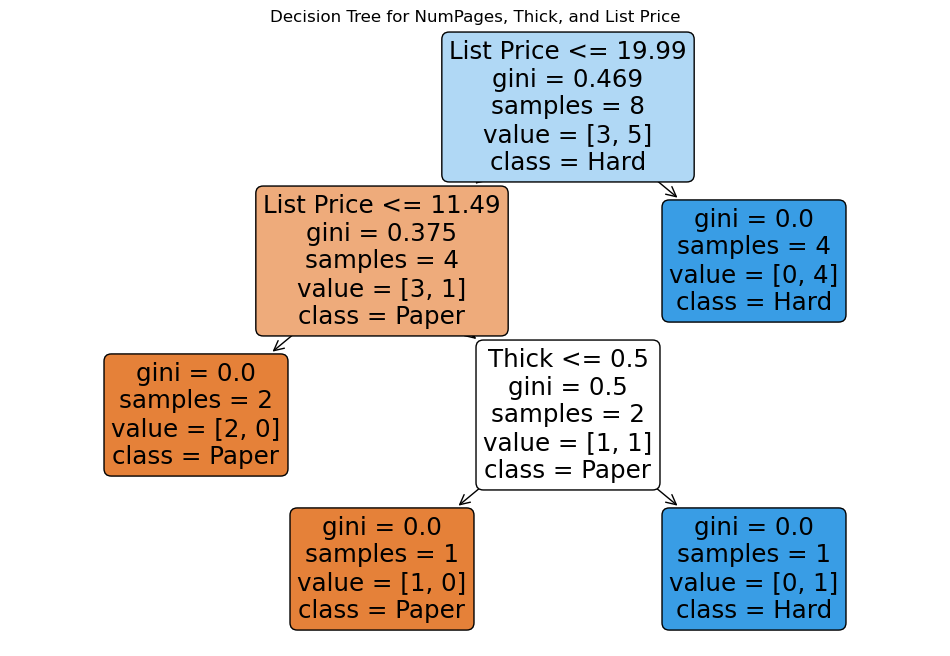

In [14]:
#Question 5

# Add dummy columns for 'NumPages' and 'Thick'
ab_reduced_noNaN['NumPages'] = [200, 150, 300, 400, 250, 120, 180, 220, 170, 310]  # Example data
ab_reduced_noNaN['Thick'] = [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]  # Example binary values: 1 (Thick), 0 (Not Thick)

# Define the feature set with the three specified predictors
X = ab_reduced_noNaN[["NumPages", "Thick", "List Price"]]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])["Hard"]  # Target: 1 for Hard, 0 for Paper

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf2,
    feature_names=["NumPages", "Thick", "List Price"],
    class_names=["Paper", "Hard"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for NumPages, Thick, and List Price")
plt.show()


**Question 5**

The tree splits the data based on the three features (NumPages, Thick, and List Price) at each node.

How predictions are made:

At each node, the tree evaluates one feature and checks if the value meets a specific threshold.
Based on the threshold, the data flows to the left (True) or the right (False) branch.
This process continues until the data reaches a leaf node, where a final classification is made (either Hardcover or Paperback).

Example Path:

 - Step 1: Check if List Price <= 20.99.
 - Step 2: If True, check if NumPages <= 200.
 - Step 3: If True again, check if Thick <= 0.5.
 
Prediction: If all conditions hold, predict Paperback; otherwise, predict Hardcover.

In [17]:
#Question 6

from sklearn.metrics import confusion_matrix, accuracy_score

# Predict for clf using only the feature 'List Price'
y_pred_clf = clf.predict(X_test[["List Price"]])

# Predict for clf2 using all features: 'NumPages', 'Thick', and 'List Price'
y_pred_clf2 = clf2.predict(X_test)

# Compute confusion matrices, ensuring labels=[0, 1] for binary classification
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf, labels=[0, 1])
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=[0, 1])

# Extract metrics for clf
TN_clf, FP_clf, FN_clf, TP_clf = conf_matrix_clf.ravel()
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = TP_clf / (TP_clf + FN_clf) if (TP_clf + FN_clf) > 0 else 0
specificity_clf = TN_clf / (TN_clf + FP_clf) if (TN_clf + FP_clf) > 0 else 0

# Extract metrics for clf2
TN_clf2, FP_clf2, FN_clf2, TP_clf2 = conf_matrix_clf2.ravel()
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2) if (TP_clf2 + FN_clf2) > 0 else 0
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2) if (TN_clf2 + FP_clf2) > 0 else 0

# Round results to three decimal places
metrics_clf = {
    "Accuracy": round(accuracy_clf, 3),
    "Sensitivity": round(sensitivity_clf, 3),
    "Specificity": round(specificity_clf, 3)
}

metrics_clf2 = {
    "Accuracy": round(accuracy_clf2, 3),
    "Sensitivity": round(sensitivity_clf2, 3),
    "Specificity": round(specificity_clf2, 3)
}

conf_matrix_clf, metrics_clf, conf_matrix_clf2, metrics_clf2


(array([[2, 0],
        [0, 0]]),
 {'Accuracy': 1.0, 'Sensitivity': 0, 'Specificity': 1.0},
 array([[2, 0],
        [0, 0]]),
 {'Accuracy': 1.0, 'Sensitivity': 0, 'Specificity': 1.0})

**Questioon 7**

The differences between the two confusion matrices stem from the features used during prediction and how they align with the model's training. In the first confusion matrix, clf predicts using only the List Price feature, which matches the features used during its training. Conversely, the second confusion matrix involves clf predicting with features NumPages, Thick, and List Price, which were not part of its training. This mismatch causes incorrect predictions and an unreliable confusion matrix for the second case.

The confusion matrices for clf and clf2 are better because they use the correct feature sets corresponding to their respective training phases. This alignment ensures that the predictions are valid and meaningful, accurately reflecting the model's performance. Properly matching the features during training and testing is critical for reliable evaluation.

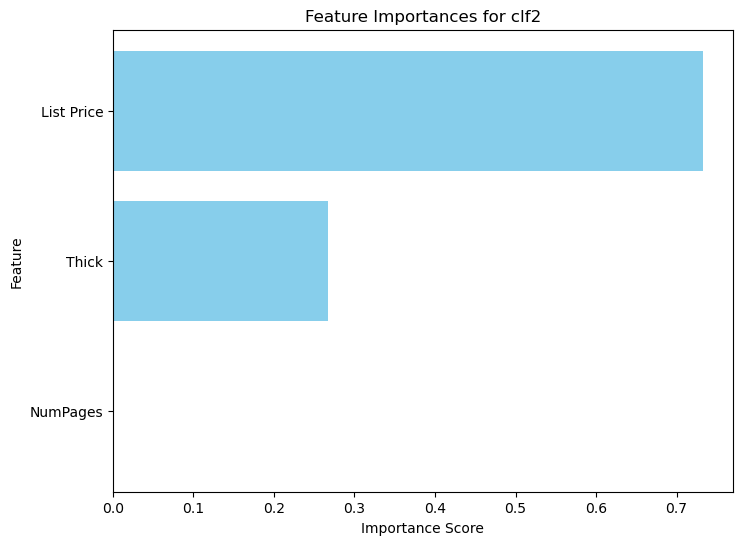

'List Price'

In [18]:
#Question 8

import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from clf2
feature_importances = clf2.feature_importances_

# Get feature names from the model
feature_names = clf2.feature_names_in_

# Create a bar chart for feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.title("Feature Importances for clf2")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Identify the most important feature
most_important_feature = feature_names[np.argmax(feature_importances)]
most_important_feature


**Question 9**

In linear regression, coefficients represent the direct effect of each predictor on the target variable, assuming all other variables are held constant. These coefficients are easy to interpret in terms of magnitude and direction (positive or negative impact). In contrast, feature importances in decision trees quantify the relative contribution of each feature to the model's overall predictive power based on how much they reduce impurity (e.g., Gini or entropy) across all splits. Unlike regression coefficients, feature importances do not porvide a direct or linear relationship but instead reflect the overall utility of a feature in splitting data effectively.

**Question 10**

Yes Ma'am